In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Path to your Excel file
file_path = '/home/ulaval.ca/lesee/projects/Project-NLST/data/results/ML-NLST-results.xlsx'
xl = pd.ExcelFile(file_path)
sheets_names = xl.sheet_names [1:2]

# Load each sheet into a separate DataFrame
sheets = {name: pd.read_excel(file_path, sheet_name=name) for name in sheets_names}

# Function to get maximum AUC_test values for each category
def max_auc_per_category(df):
    return df.groupby('Category')['AUC_test'].max()

# Apply this function to each sheet
max_aucs = {name: max_auc_per_category(sheet) for name, sheet in sheets.items()}

# Combine the results into a single DataFrame, with sheets as columns and categories as rows
max_aucs_df = pd.DataFrame(max_aucs)


# Number of sheets
n_sheets = len(sheets_names)
print(sheets_names)

['delta']


In [7]:
# Number of categories
categories = max_aucs_df.index
n_categories = len(categories)

# Width of the bars
bar_width = 0.25

# Adjust the inter-group spacing
group_spacing = 0.3  # Adjust space between groups
#indices = np.arange(n_categories) * (1 + group_spacing)
indices = np.arange(n_sheets) * (n_categories * bar_width + group_spacing) + (n_categories * bar_width / 2) - (bar_width / 2)

In [8]:
print(max_aucs_df.index)

Index(['No-Smote', 'No-Smote-KT', 'No-Smote-TC', 'Smote', 'Smote-All',
       'Smote-KT', 'Smote-Scanner', 'Smote-TC'],
      dtype='object', name='Category')


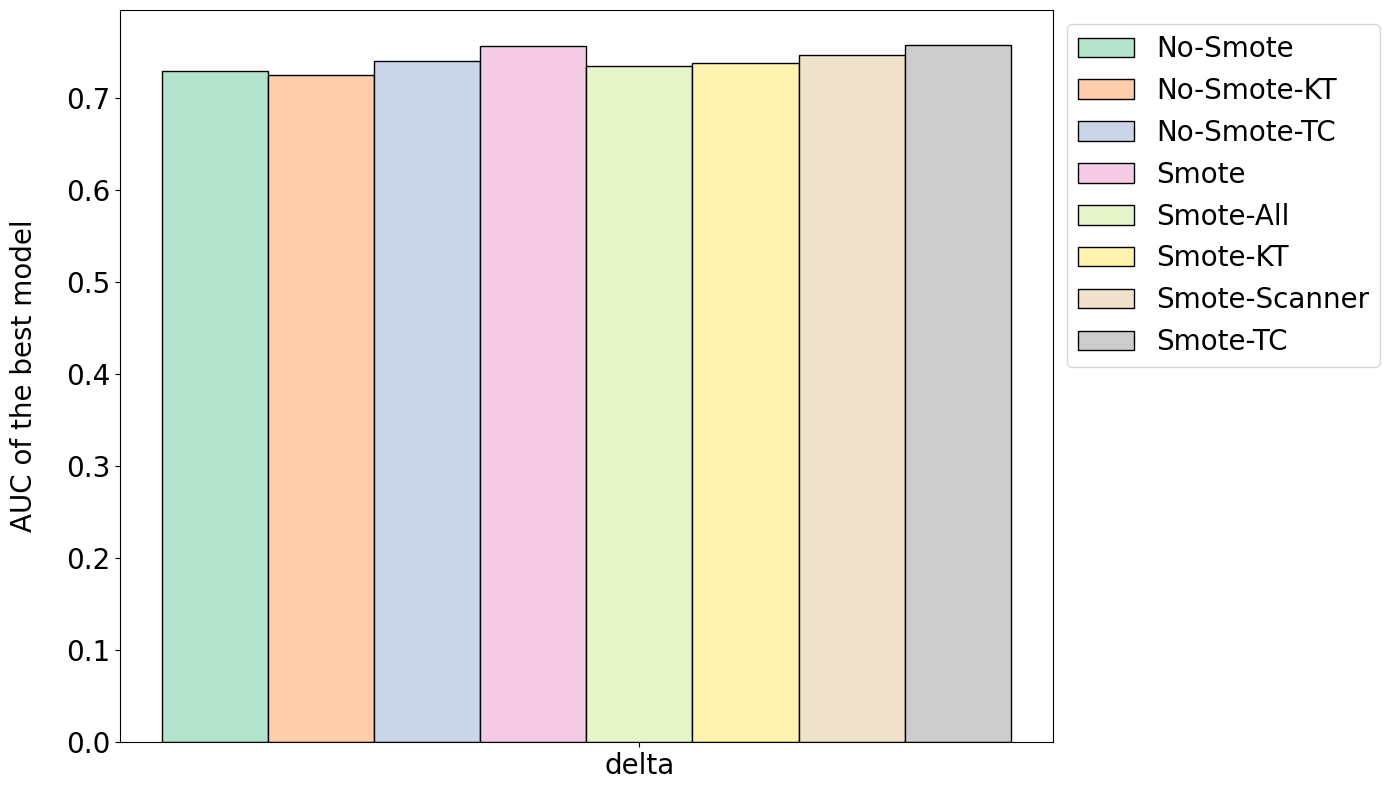

In [9]:
# Define colors (pastel shades)
colors = plt.cm.Pastel2(np.linspace(0, 1, len(max_aucs_df.index)))  # Generate distinct pastel colors
#colors = plt.cm.viridis(np.linspace(0, 1, len(max_aucs_df.index)))  # generate distinct colors

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))
# Plot each set of bars
for i, category in enumerate(max_aucs_df.index):
    # Offset position for each bar in a group
#    offsets = np.arange(n_sheets) * (bar_width * len(max_aucs_df.index) + 0.5)
#    values = max_aucs_df.loc[category]
#    ax.bar(offsets + i * bar_width, values, width=bar_width, label=category, color=colors[i % len(colors)], edgecolor='grey')
    bar_positions = indices - (n_categories * bar_width / 2) + i * bar_width
    ax.bar(bar_positions, max_aucs_df.iloc[i], width=bar_width, label=max_aucs_df.index[i], color=colors[i], edgecolor='black')
# Set axis labels and chart title
ax.set_ylabel('AUC of the best model', fontsize=20, labelpad=20)
#ax.set_title('Comparison of the AUC for the best model using different feature sets for different pipelines')



# Set x-ticks to be in the middle of the groups
#ax.set_xticks(np.arange(n_sheets) * (bar_width * len(max_aucs_df.index) + 0.1) + bar_width * (len(max_aucs_df.index) - 1) )
ax.set_xticks(indices)
ax.set_xticklabels(sheets_names, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the y-tick label size

# Adding a legend and place it outside of the plot
ax.legend(title=None, loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)

# Adjust layout and rotation for x-tick labels
plt.xticks()
plt.tight_layout()
plt.savefig('max_auc_comparison_by_featuresets_delta_pastel.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()